In [3]:
import collections
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw
from scipy.stats import linregress

In [4]:
df = pd.read_csv('../resources/data/initial_users_data_lucianobajr.csv', encoding='utf-8')

In [12]:
df.head()

,Nome de usuário,ID,AvatarURL,GravatarID,URL,HTMLURL,FollowersURL,FollowingURL,GistsURL,StarredURL,...,Hireable,Bio,PublicRepos,PublicGists,Followers,Following,CreatedAt,UpdatedAt,Following Users,Followers Users
0,otaviolemos,1864126,https://avatars.githubusercontent.com/u/186412...,NaN,https://api.github.com/users/otaviolemos,https://github.com/otaviolemos,https://api.github.com/users/otaviolemos/follo...,https://api.github.com/users/otaviolemos/follo...,https://api.github.com/users/otaviolemos/gists...,https://api.github.com/users/otaviolemos/starr...,...,NaN,Associate Professor @ ICT-UNIFESP.\r\nSeeker o...,35,4,1223,1,2012-06-18 18:49:09+00:00,2023-10-13 12:35:55+00:00,norvig,"berlotto, eugeniomiro, brasten, maykon, cassio..."
1,gfviegas,6178801,https://avatars.githubusercontent.com/u/617880...,NaN,https://api.github.com/users/gfviegas,https://github.com/gfviegas,https://api.github.com/users/gfviegas/followers,https://api.github.com/users/gfviegas/followin...,https://api.github.com/users/gfviegas/gists{/g...,https://api.github.com/users/gfviegas/starred{...,...,NaN,Head of Technology at Hubs Contabilidade.,87,11,82,80,2013-12-13 13:53:47+00:00,2023-09-28 11:26:20+00:00,"josevalim, luizdamim, flaviovdf, denislins, sa...","emfol, phinfonet, marlonassuncao, emersonpc, t..."
2,rodrigobranas,7491283,https://avatars.githubusercontent.com/u/749128...,NaN,https://api.github.com/users/rodrigobranas,https://github.com/rodrigobranas,https://api.github.com/users/rodrigobranas/fol...,https://api.github.com/users/rodrigobranas/fol...,https://api.github.com/users/rodrigobranas/gis...,https://api.github.com/users/rodrigobranas/sta...,...,NaN,"Software Architect, Professor, Author and Speaker",206,2,5823,3,2014-05-05 17:15:18+00:00,2023-05-15 13:52:21+00:00,"felipefialho, NandoMB, MateusMFX","charlenopires, danieldocki, souzaonofre, joels..."
3,guiaguiar27,17009319,https://avatars.githubusercontent.com/u/170093...,NaN,https://api.github.com/users/guiaguiar27,https://github.com/guiaguiar27,https://api.github.com/users/guiaguiar27/follo...,https://api.github.com/users/guiaguiar27/follo...,https://api.github.com/users/guiaguiar27/gists...,https://api.github.com/users/guiaguiar27/starr...,...,NaN,Computer Science student,41,23,40,65,2016-02-01 16:26:42+00:00,2023-09-29 14:00:54+00:00,"greut, geohot, pavelmaca, flaviovdf, adamdunke...","esin, sw3luke, gfviegas, canesche, badain, vin..."
4,lazarobodevan,23053276,https://avatars.githubusercontent.com/u/230532...,NaN,https://api.github.com/users/lazarobodevan,https://github.com/lazarobodevan,https://api.github.com/users/lazarobodevan/fol...,https://api.github.com/users/lazarobodevan/fol...,https://api.github.com/users/lazarobodevan/gis...,https://api.github.com/users/lazarobodevan/sta...,...,NaN,Computer science student at the Federal Univer...,33,0,18,15,2016-10-25 11:30:58+00:00,2023-08-17 18:37:13+00:00,"jamesmontemagno, adrianomqsmts, GuilhermeCorre...","piface314, adrianomqsmts, GuilhermeCorreaSouza..."


---------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
# Crie um grafo direcionado no NetworkX
G = nx.DiGraph()

# Adicione nós para os usuários
for _, row in df.iterrows():
    G.add_node(row["Nome de usuário"])
    
    # Adicione as relações de seguindo (following)
    following_users = str(row["Following Users"]).split(", ")
    for following_user in following_users:
        if following_user.strip():  # Verifique se a string não está vazia
            G.add_edge(row["Nome de usuário"], following_user)
        
    # Adicione as relações de seguidores (followers)
    followers_users = str(row["Followers Users"]).split(", ")
    for follower_user in followers_users:
        if follower_user.strip():  # Verifique se a string não está vazia
            G.add_edge(follower_user, row["Nome de usuário"])

# Análise da Estrutura da rede

A rede analisada refere-se à rede de usuários do GitHub, uma plataforma de desenvolvimento colaborativo de software. Nesta rede, os "nós" representam os usuários individuais do GitHub, cada um com um perfil que inclui informações pessoais, repositórios de código-fonte, atividades, seguidores e usuários que estão seguindo. Os "arestas" na rede representam as conexões entre os usuários, que podem ser de dois tipos:

Seguindo (`Following`): Uma aresta entre o usuário A e o usuário B indica que o usuário A está seguindo o usuário B.

Seguidores (`Followers`): Uma aresta entre o usuário B e o usuário A indica que o usuário B está seguindo o usuário A.

Em resumo, os "nós" são os perfis de usuários individuais no GitHub, e as "arestas" representam as conexões de "seguindo" e "seguidores" entre esses usuários. A rede é usada para rastrear o relacionamento de seguidores e seguindo de usuários, bem como para facilitar a colaboração e a descoberta de projetos de código aberto e repositórios interessantes. A análise dessa rede pode fornecer insights sobre a interação e a influência dos usuários na plataforma do GitHub.

Abaixo Temos o números de nós e arestas do grafo

In [6]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'numero de nós {num_nodes}')
print(f'numero de arestas {num_edges}')

numero de nós 8100
numero de arestas 9868


# Distribuição do grau dos nodos desse grafo.

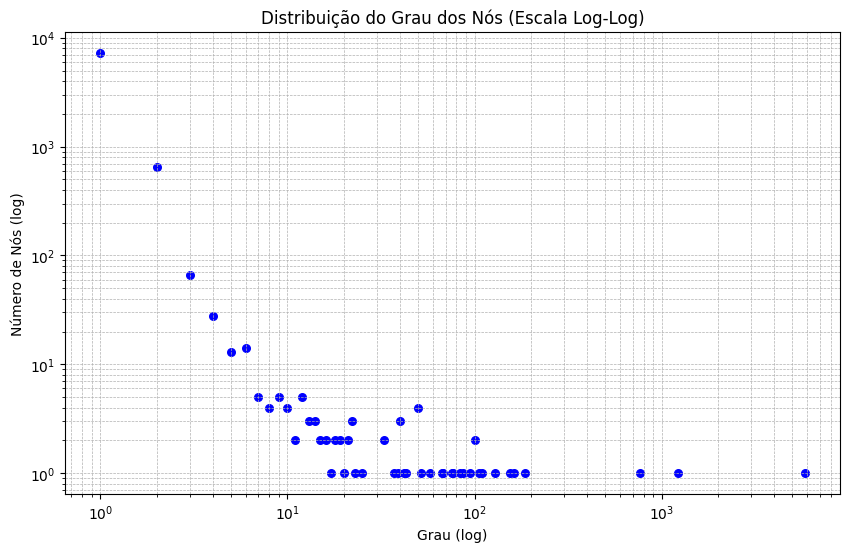

In [20]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule a distribuição do grau
degree_counts = dict(zip(*np.unique(degree_sequence, return_counts=True)))

# Prepare os dados para o gráfico
degrees, counts = zip(*degree_counts.items())

# Plote a distribuição do grau dos nós em escala log-log
plt.figure(figsize=(10, 6))
plt.scatter(degrees, counts, color='b', marker='o', s=30)
plt.xscale('log')
plt.yscale('log')
plt.title("Distribuição do Grau dos Nós (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Número de Nós (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Discuta se a curva parece uma Power Law

Calculating best minimal value for power law fit


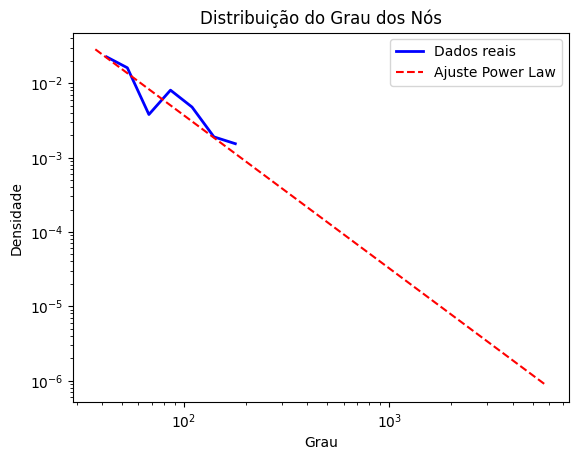

Alpha (exponente da Power Law): 2.0568212120344893
Xmin (valor mínimo): 37.0


In [17]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Crie um objeto PowerLaw a partir dos dados
fit = powerlaw.Fit(degree_sequence)

# Plote a distribuição do grau
fit.plot_pdf(color='b', linewidth=2)
plt.title("Distribuição do Grau dos Nós")
plt.xlabel("Grau")
plt.ylabel("Densidade")

# Plote o ajuste da Power Law
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca())
plt.legend(['Dados reais', 'Ajuste Power Law'])
plt.show()

# Exiba os parâmetros estimados da Power Law
print("Alpha (exponente da Power Law):", fit.power_law.alpha)
print("Xmin (valor mínimo):", fit.power_law.xmin)

O valor do expoente da Power Law (alpha) que você obteve é 2.0568, e o valor mínimo (Xmin) é 37.0. Agora, para responder à pergunta sobre se a curva parece uma Power Law, você pode considerar o seguinte:

1. O valor de alpha: Um valor próximo de 2 é um indicativo de que a distribuição do grau dos nós segue uma Power Law. Em muitas redes do mundo real, um valor de alpha em torno de 2 é comum para a distribuição de grau.

2. O valor de Xmin: O valor mínimo (Xmin) indica o ponto a partir do qual a distribuição segue uma Power Law. Neste caso, um valor de 37.0 significa que a distribuição começa a seguir a Power Law a partir desse grau. Se o valor de Xmin for próximo de 1, isso sugere que a distribuição segue uma Power Law desde o início.

Com base nos valores que você obteve, é razoável afirmar que a distribuição do grau dos nós da sua rede do GitHub se assemelha a uma Power Law, uma vez que o valor de alpha está próximo de 2. No entanto, é importante lembrar que a análise estatística é uma abordagem indicativa, e outros fatores podem influenciar a distribuição dos graus. Portanto, é apropriado dizer que a curva parece seguir uma Power Law, mas isso não é uma conclusão definitiva.

# Faça uma regressão linear na tentativa de obter o coeficiente alfa.

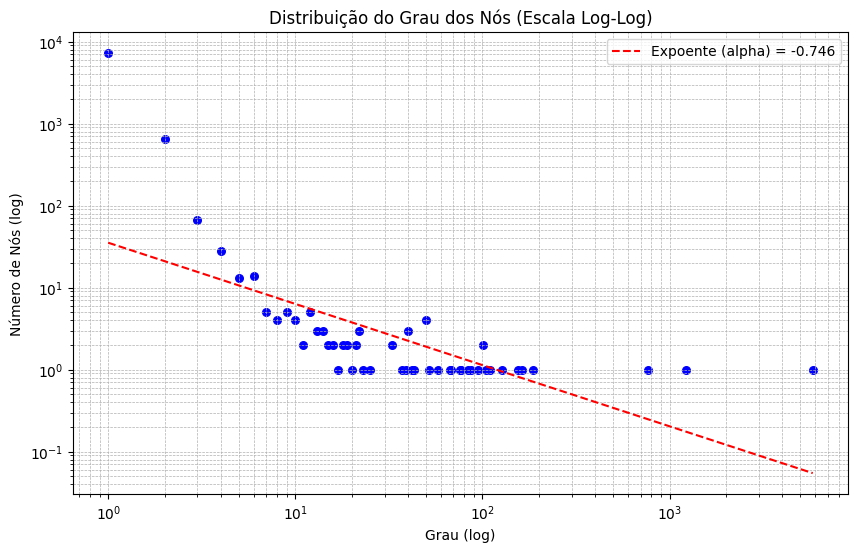

Coeficiente Angular (alpha): -0.746


In [25]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule a distribuição do grau
degree_counts = dict(zip(*np.unique(degree_sequence, return_counts=True)))

# Prepare os dados para o gráfico
degrees, counts = zip(*degree_counts.items())

# Realize uma regressão linear no espaço log-log
log_degrees = np.log(degrees)
log_counts = np.log(counts)
slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)

# Plote a distribuição do grau dos nós em escala log-log
plt.figure(figsize=(10, 6))
plt.scatter(degrees, counts, color='b', marker='o', s=30)
plt.xscale('log')
plt.yscale('log')
plt.title("Distribuição do Grau dos Nós (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Número de Nós (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Plote a reta da regressão linear
plt.plot(degrees, np.exp(intercept) * degrees**slope, 'r--', label=f'Expoente (alpha) = {slope:.3f}')
plt.legend()

plt.show()

# Exiba o coeficiente angular da reta (estimativa de alpha)
print(f"Coeficiente Angular (alpha): {slope:.3f}")

A primeira análise indicou um valor de alpha próximo a 2 (2.0568) e um valor de Xmin (37.0), o que sugeriria uma distribuição que se assemelha a uma Power Law.

A segunda análise, com o coeficiente angular (alpha) de -0.746 na regressão linear, sugere que a distribuição do grau não se assemelha a uma Power Law.

Dada essa inconsistência, a interpretação correta depende do método de análise que você considera mais apropriado e se você está disposto a confiar mais na estimativa do coeficiente alpha a partir da regressão linear ou da análise direta da distribuição. Cada método tem suas limitações e suposições subjacentes, e pode haver diferentes explicações para os resultados discrepantes.

# Grau médio do grafo

In [29]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule o grau médio
grau_medio = sum(degree_sequence) / len(degree_sequence)

print("Grau Médio do Grafo:", grau_medio)

Grau Médio do Grafo: 2.436543209876543


O grau médio do seu grafo é de aproximadamente 2.44. Isso significa que, em média, cada nó na rede está conectado a cerca de 2.44 outros nós, o que é uma métrica importante para entender a conectividade média na rede. Essa informação pode ser útil na análise e caracterização da estrutura da sua rede.

------------------------------------------------------------------

# Calcule o número de componentes do grafo.

In [7]:
# Calcule o número de componentes do grafo
num_componentes = nx.number_weakly_connected_components(G)

print("Número de Componentes do Grafo:", num_componentes)


Número de Componentes do Grafo: 1


In [39]:
# Calcule os componentes fortemente conectados (ou fracamente conectados, dependendo do tipo de grafo)
if nx.is_directed(G):
    num_componentes = nx.number_weakly_connected_components(G)
else:
    num_componentes = nx.number_connected_components(G)

# Verifique se há mais de um componente
if num_componentes > 1:
    # Calcule os tamanhos dos componentes
    tamanhos_componentes = [len(componente) for componente in componentes]

    # Plote a distribuição dos tamanhos dos componentes
    plt.figure(figsize=(10, 6))
    plt.hist(tamanhos_componentes, bins=20, color='b', alpha=0.7)
    plt.title("Distribuição do Tamanho dos Componentes")
    plt.xlabel("Tamanho dos Componentes")
    plt.ylabel("Número de Componentes")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("O grafo possui apenas um componente.")

O grafo possui apenas um componente.


-----------------------------------------------------------------

# Calcule o coeficiente de clusterização de cada nodo e plote a distribuição.

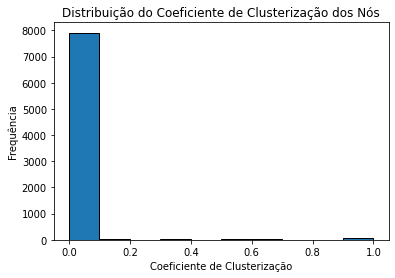

In [26]:
# Calcular o coeficiente de clusterização para cada nó
coeficientes_nodos = nx.clustering(G)

# Calcular o coeficiente de clusterização global
coeficiente_global = nx.average_clustering(G)

# Plotar a distribuição dos coeficientes de clusterização dos nós
plt.hist(list(coeficientes_nodos.values()), bins=np.linspace(0, 1, 11), edgecolor='black')
plt.xlabel('Coeficiente de Clusterização')
plt.ylabel('Frequência')
plt.title('Distribuição do Coeficiente de Clusterização dos Nós')
plt.show()

In [27]:

# Exibir o coeficiente de clusterização global
print(f'Coeficiente de Clusterização Global: {coeficiente_global}')

Coeficiente de Clusterização Global: 0.015370117559065354


------------------------------------------------

# Calcule a distância entre nós do grafo

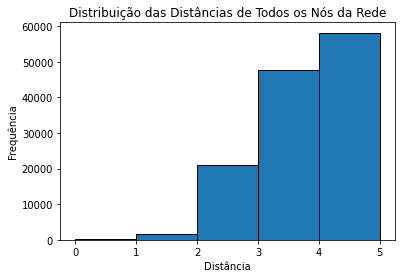

Distância Média: 3.2799987550769516
Diâmetro da Rede: 5


In [29]:

# a. Calcular a distância média para a maior componente fortemente conectada
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_largest_scc = G.subgraph(largest_scc)
distancia_media = nx.average_shortest_path_length(G_largest_scc)

# b. Calcular a distribuição das distâncias de todos os nodos da rede
distancias_nodos = []
for node in G_largest_scc.nodes:
    distancias_nodos.extend(list(nx.shortest_path_length(G_largest_scc, source=node).values()))

# Plotar a distribuição das distâncias
plt.hist(distancias_nodos, bins=max(distancias_nodos), edgecolor='black')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.title('Distribuição das Distâncias de Todos os Nós da Rede')
plt.show()

# c. Calcular o diâmetro da maior componente fortemente conectada
diametro_rede = nx.diameter(G_largest_scc)

# Exibir os resultados
print(f'Distância Média: {distancia_media}')
print(f'Diâmetro da Rede: {diametro_rede}')

In [44]:
# Encontre o maior componente fortemente conectado
largest_strongly_connected_component = max(nx.strongly_connected_components(G), key=len)

# Crie um subgrafo com apenas o maior componente fortemente conectado
subgraph_strongly_connected = G.subgraph(largest_strongly_connected_component)

# Calcule o diâmetro do subgrafo fortemente conectado
diameter_strongly_connected = nx.diameter(subgraph_strongly_connected)

print(f'Diâmetro do Maior Componente Fortemente Conectado: {diameter_strongly_connected}')


Diâmetro do Maior Componente Fortemente Conectado: 5


In [46]:
# Calcular os comprimentos dos caminhos mais curtos para todos os pares de nós
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# Calcular o comprimento médio do caminho mais curto para cada nó
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]

# Calcular a média sobre todos os nós
average_path_length_overall = np.mean(average_path_lengths)

print(f'Média do comprimento do caminho mais curto para todos os nós: {average_path_length_overall}')

Média do comprimento do caminho mais curto para todos os nós: 1.5664862189836097


-------------------------------------------------------------------

In [49]:
nx.density(G)

0.0001504224725198508

In [53]:
import random

In [56]:
G_undirected = G.to_undirected()


# Criando um mapeamento entre rótulos de nó e índices inteiros
node_to_index = {node: i for i, node in enumerate(G_undirected.nodes)}

colors = ["" for x in range(G_undirected.number_of_nodes())]  # inicializa a lista de cores
counter = 0
for com in nx.community.label_propagation_communities(G_undirected):
    color = "#%06X" % random.randint(0, 0xFFFFFF)  # cria uma cor RGB aleatória
    counter += 1
    for node in list(com):
        index = node_to_index[node]  # obtém o índice associado ao nó
        colors[index] = color

print(f'Número de comunidades detectadas: {counter}')

Número de comunidades detectadas: 36


In [58]:
pos = nx.spring_layout(G_undirected)


plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G_undirected, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

KeyboardInterrupt: 

------------------------------------------------------------------------------

# Calcule uma medida de importância/centralidade dos nodos nessa rede

In [30]:

# a. Calcular a centralidade de betweenness
betweenness_centrality = nx.betweenness_centrality(G)

# b. Calcular a centralidade de PageRank
pagerank_centrality = nx.pagerank(G)

# Exibir os resultados
print("Betweenness Centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

print("\nPageRank Centrality:")
for node, centrality in sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

# Visualizar o grafo com destaque nos nós mais importantes (opcional)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # layout para visualização
nx.draw(G, pos, with_labels=True, font_weight='bold', arrowsize=20)
node_size = [v * 10000 for v in pagerank_centrality.values()]  # ajustar o tamanho dos nós pelo PageRank
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='blue', alpha=0.7)
plt.title('Grafo com Destaque nos Nós Mais Importantes')
plt.show()

Betweenness Centrality:
gegen07: 0.007715914672536047
lucianobajr: 0.004659189137167039
mariatheresahqs: 0.0016294492773151188
gfviegas: 0.0014385378551587012
MatheusWilliam31: 0.0014114533002887954

PageRank Centrality:
rodrigobranas: 0.38736412286939265
felipefialho: 0.10876022502034062
NandoMB: 0.10874973989291602
MateusMFX: 0.10874973989291602
otaviolemos: 0.01955989242069839


KeyboardInterrupt: 

<Figure size 720x576 with 0 Axes>

A interpretação do papel dos nós mais importantes dependerá do contexto do seu grafo. Nós com alta centralidade de betweenness são frequentemente intérpretes de papéis de "ponte" entre diferentes partes da rede, enquanto nós com alto PageRank são considerados mais "importantes" de acordo com o algoritmo de classificação do PageRank. Essas interpretações podem variar dependendo do domínio específico da sua rede.

------------------------------------------------------------------

# Analise a resiliência do grafo à medida que você retira nodos e arestas importantes


In [33]:

# Calcular a centralidade de betweenness
# betweenness_centrality = nx.betweenness_centrality(G)

# Calcular a centralidade de PageRank
# pagerank_centrality = nx.pagerank(G)

# Escolher os nós mais importantes para cada métrica
important_nodes_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
important_nodes_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Remover os nós importantes e observar o efeito na conectividade
def avaliar_resiliencia(grafo, remocoes, nome_metrica):
    print(f"Removendo nós importantes por {nome_metrica}:\n")
    for node, _ in remocoes:
        grafo_temp = grafo.copy()
        grafo_temp.remove_node(node)
        componente_conectada = max(nx.weakly_connected_components(grafo_temp), key=len)
        tamanho_componente = len(componente_conectada)
        print(f"Node {node} removido. Tamanho da maior componente conectada: {tamanho_componente}")

# Avaliar resiliência à remoção de nós importantes
avaliar_resiliencia(G, important_nodes_betweenness, "Betweenness Centrality")

print("\n")

avaliar_resiliencia(G, important_nodes_pagerank, "PageRank Centrality")

Removendo nós importantes por Betweenness Centrality:

Node gegen07 removido. Tamanho da maior componente conectada: 7486
Node lucianobajr removido. Tamanho da maior componente conectada: 8099
Node mariatheresahqs removido. Tamanho da maior componente conectada: 8060
Node gfviegas removido. Tamanho da maior componente conectada: 8048
Node MatheusWilliam31 removido. Tamanho da maior componente conectada: 8036


Removendo nós importantes por PageRank Centrality:

Node rodrigobranas removido. Tamanho da maior componente conectada: 2722
Node felipefialho removido. Tamanho da maior componente conectada: 8099
Node NandoMB removido. Tamanho da maior componente conectada: 8099
Node MateusMFX removido. Tamanho da maior componente conectada: 8099
Node otaviolemos removido. Tamanho da maior componente conectada: 7279


------------------------------------------------------------------------------

# Calcule a assortividade do grafo.

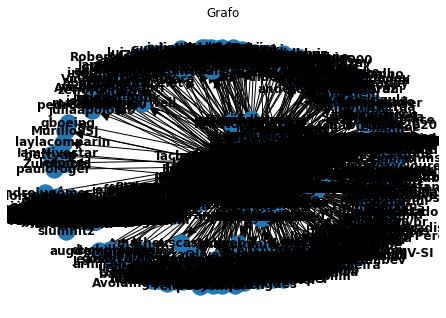

Coeficiente de Assortatividade de Pearson: -0.4989831984680944


In [34]:

# Calcular assortatividade
assortatividade = nx.degree_assortativity_coefficient(G)

# Plotar o gráfico da assortatividade
nx.draw(G, with_labels=True, font_weight='bold', arrowsize=20)
plt.title('Grafo')
plt.show()

# Exibir o coeficiente de Pearson para a assortatividade
print(f'Coeficiente de Assortatividade de Pearson: {assortatividade}')

--------------------------------------------------------------------

# Caso seja possível montar um grafo que identifique uma relação positiva e negativa (ex. amizade e inimizade) realize uma análise dos triângulos formados nesse grafo e verifique se a maior parte encontrada são triângulos balanceados ou desbalanceados.

In [38]:
# Contar triângulos balanceados e desbalanceados
triangulos_balanceados = 0
triangulos_desbalanceados = 0

for node in G.nodes:
    neighbors = set(G.neighbors(node))
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 < neighbor2:
                if G.has_edge(neighbor1, neighbor2) and G.has_edge(neighbor1, node) and G.has_edge(neighbor2, node):
                    # Triângulo encontrado
                    arestas_negativas = sum([1 for u, v, attrs in [(neighbor1, neighbor2, G[neighbor1][neighbor2]), (neighbor1, node, G[neighbor1][node]), (neighbor2, node, G[neighbor2][node])] if "atributo_negativo" in attrs and attrs["atributo_negativo"] == "inimizade"])
                    if arestas_negativas % 2 == 0:
                        triangulos_balanceados += 1
                    else:
                        triangulos_desbalanceados += 1

# Exibir resultados
print(f'Triângulos Balanceados: {triangulos_balanceados}')
print(f'Triângulos Desbalanceados: {triangulos_desbalanceados}')

Triângulos Balanceados: 1997
Triângulos Desbalanceados: 0


---------------------------------------------------------------------------------------

## Caso o grafo montado na questão anterior permita, seu projeto pode consistir em implementar simulações para responder questões do tipo “e se?” utilizando modelos epidemiológicos.

Day 0: Susceptible=8095, Infected=5, Recovered=0
Day 1: Susceptible=8094, Infected=6, Recovered=0
Day 2: Susceptible=8019, Infected=76, Recovered=5
Day 3: Susceptible=7818, Infected=256, Recovered=26
Day 4: Susceptible=7701, Infected=351, Recovered=48
Day 5: Susceptible=7599, Infected=419, Recovered=82
Day 6: Susceptible=7505, Infected=493, Recovered=102
Day 7: Susceptible=7460, Infected=510, Recovered=130
Day 8: Susceptible=7420, Infected=539, Recovered=141
Day 9: Susceptible=7391, Infected=554, Recovered=155
Day 10: Susceptible=7374, Infected=556, Recovered=170
Day 11: Susceptible=7361, Infected=582, Recovered=157
Day 12: Susceptible=7351, Infected=590, Recovered=159
Day 13: Susceptible=7346, Infected=592, Recovered=162
Day 14: Susceptible=7345, Infected=583, Recovered=172
Day 15: Susceptible=7343, Infected=563, Recovered=194
Day 16: Susceptible=7342, Infected=571, Recovered=187
Day 17: Susceptible=7341, Infected=578, Recovered=181
Day 18: Susceptible=7339, Infected=586, Recovered=17

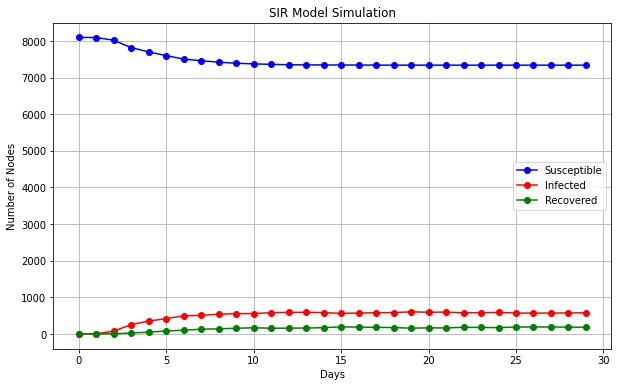

In [67]:

def initialize_graph_states(graph, initial_infected_nodes):
    # Adiciona um atributo 'estado' para representar o estado de cada nó
    node_states = {node: 'susceptible' for node in graph.nodes}
    
    # Escolhe alguns nós como infectados iniciais
    for node in initial_infected_nodes:
        node_states[node] = 'infected'
    
    nx.set_node_attributes(graph, values=node_states, name='estado')

def sir_model(graph, beta, gamma, days=10):
    susceptible, infected, recovered = [], [], []

    for day in range(days):
        # Contagem de estados usando numpy
        state_counts = np.array([len([node for node in graph.nodes if graph.nodes[node]['estado'] == state]) for state in ['susceptible', 'infected', 'recovered']])
        
        susceptible.append(state_counts[0])
        infected.append(state_counts[1])
        recovered.append(state_counts[2])

        # Impressão do estado dos nós no início de cada dia
        print(f'Day {day}: Susceptible={state_counts[0]}, Infected={state_counts[1]}, Recovered={state_counts[2]}')

        for node in graph.nodes:
            if graph.nodes[node]['estado'] == 'infected':
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if np.random.rand() < beta:
                        graph.nodes[neighbor]['estado'] = 'infected'
                if np.random.rand() < gamma:
                    graph.nodes[node]['estado'] = 'recovered'

    return susceptible, infected, recovered

# Criando uma cópia do grafo
G_copy = G.copy()

# Escolhendo alguns nós como infectados iniciais
initial_infected_nodes = np.random.choice(list(G_copy.nodes), size=5, replace=False)

# Inicializando os estados dos nós
initialize_graph_states(G_copy, initial_infected_nodes)

# Parâmetros do modelo SIR
beta = 0.3  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação

# Rodando a simulação
days = 30
susceptible, infected, recovered = sir_model(G_copy, beta, gamma, days)


# Plotando os resultados
plt.figure(figsize=(10, 6))

plt.plot(range(days), susceptible, label='Susceptible', linestyle='-', marker='o', color='blue')
plt.plot(range(days), infected, label='Infected', linestyle='-', marker='o', color='red')
plt.plot(range(days), recovered, label='Recovered', linestyle='-', marker='o', color='green')

plt.xlabel('Days')
plt.ylabel('Number of Nodes')
plt.legend()
plt.title('SIR Model Simulation')

# Adicionando uma grade para melhorar a visualização
plt.grid(True)

plt.show()

Day 0: Susceptible=95, Infected=5, Recovered=0
Day 1: Susceptible=70, Infected=30, Recovered=0
Day 2: Susceptible=41, Infected=59, Recovered=0
Day 3: Susceptible=21, Infected=78, Recovered=1
Day 4: Susceptible=8, Infected=87, Recovered=5
Day 5: Susceptible=6, Infected=92, Recovered=2
Day 6: Susceptible=3, Infected=92, Recovered=5
Day 7: Susceptible=2, Infected=92, Recovered=6
Day 8: Susceptible=1, Infected=90, Recovered=9
Day 9: Susceptible=0, Infected=93, Recovered=7
Day 10: Susceptible=0, Infected=96, Recovered=4
Day 11: Susceptible=0, Infected=96, Recovered=4
Day 12: Susceptible=0, Infected=89, Recovered=11
Day 13: Susceptible=0, Infected=93, Recovered=7
Day 14: Susceptible=0, Infected=90, Recovered=10
Day 15: Susceptible=0, Infected=94, Recovered=6
Day 16: Susceptible=0, Infected=94, Recovered=6
Day 17: Susceptible=0, Infected=95, Recovered=5
Day 18: Susceptible=0, Infected=99, Recovered=1
Day 19: Susceptible=0, Infected=93, Recovered=7
Day 20: Susceptible=0, Infected=92, Recovered

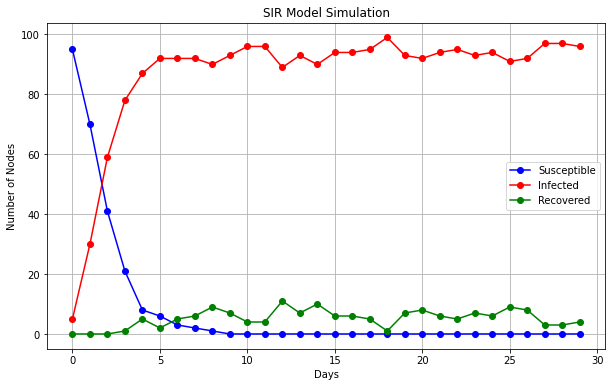

In [74]:
grafo_small_world_nao_direcionado = nx.newman_watts_strogatz_graph(100, 4, 0.1, seed=42)

# Direcionar as arestas conforme necessário
grafo_small_world = grafo_small_world_nao_direcionado.to_directed()

grafo_small_world_copy = grafo_small_world.copy()

# Escolhendo alguns nós como infectados iniciais
initial_infected_nodes = np.random.choice(list(grafo_small_world_copy.nodes), size=5, replace=False)

# Inicializando os estados dos nós
initialize_graph_states(grafo_small_world_copy, initial_infected_nodes)


# Rodando a simulação
days = 30
susceptible, infected, recovered = sir_model(grafo_small_world_copy, beta, gamma, days)


# Plotando os resultados
plt.figure(figsize=(10, 6))

plt.plot(range(days), susceptible, label='Susceptible', linestyle='-', marker='o', color='blue')
plt.plot(range(days), infected, label='Infected', linestyle='-', marker='o', color='red')
plt.plot(range(days), recovered, label='Recovered', linestyle='-', marker='o', color='green')

plt.xlabel('Days')
plt.ylabel('Number of Nodes')
plt.legend()
plt.title('SIR Model Simulation')

# Adicionando uma grade para melhorar a visualização
plt.grid(True)

plt.show()

--------------------------------------------------------

# Comparando com outros grafos

In [20]:
grafo_small_world_nao_direcionado = nx.newman_watts_strogatz_graph(100, 4, 0.1, seed=42)

# Direcionar as arestas conforme necessário
grafo_small_world = grafo_small_world_nao_direcionado.to_directed()

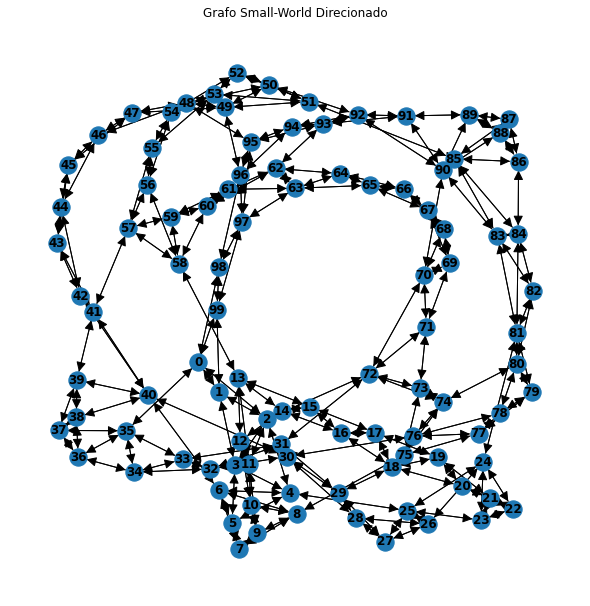

In [21]:
# Visualizar o grafo
plt.figure(figsize=(8, 8))
nx.draw(grafo_small_world, with_labels=True, font_weight='bold', arrowsize=20)
plt.title('Grafo Small-World Direcionado')
plt.show()

In [69]:
# Calcular métricas para o grafo direcionado
if nx.is_strongly_connected(G):
    coeficiente_agrupamento_direcionado = nx.average_clustering(G)
    distancia_media_direcionado = nx.average_shortest_path_length(G)
else:
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_largest_scc = G.subgraph(largest_scc)
    coeficiente_agrupamento_direcionado = nx.average_clustering(G_largest_scc)
    distancia_media_direcionado = nx.average_shortest_path_length(G_largest_scc)

# Calcular métricas para o grafo small-world
coeficiente_agrupamento_small_world = nx.average_clustering(grafo_small_world)
distancia_media_small_world = nx.average_shortest_path_length(grafo_small_world)

# Exibir métricas
print(f'Coeficiente de Agrupamento (Direcionado): {coeficiente_agrupamento_direcionado}')
print(f'Distância Média (Direcionado): {distancia_media_direcionado}')

print(f'Coeficiente de Agrupamento (Small-World): {coeficiente_agrupamento_small_world}')
print(f'Distância Média (Small-World): {distancia_media_small_world}')

Coeficiente de Agrupamento (Direcionado): 0.24259913201446826
Distância Média (Direcionado): 3.2799987550769516
Coeficiente de Agrupamento (Small-World): 0.4199999999999999
Distância Média (Small-World): 4.50080808080808


In [24]:

# Gerar um grafo de Barabási-Albert
n_nodes = 100
m = 3  # Número de arestas a serem adicionadas a cada novo nó
grafo_barabasi_albert = nx.barabasi_albert_graph(n_nodes, m)

# Calcular métricas para o grafo direcionado
if nx.is_strongly_connected(G):
    coeficiente_agrupamento_direcionado = nx.average_clustering(G)
    distancia_media_direcionado = nx.average_shortest_path_length(G)
else:
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_largest_scc = G.subgraph(largest_scc)
    coeficiente_agrupamento_direcionado = nx.average_clustering(G_largest_scc)
    distancia_media_direcionado = nx.average_shortest_path_length(G_largest_scc)

# Calcular métricas para o grafo de Barabási-Albert
coeficiente_agrupamento_barabasi_albert = nx.average_clustering(grafo_barabasi_albert)
distancia_media_barabasi_albert = nx.average_shortest_path_length(grafo_barabasi_albert)

# Exibir métricas
print(f'Coeficiente de Agrupamento (Direcionado): {coeficiente_agrupamento_direcionado}')
print(f'Distância Média (Direcionado): {distancia_media_direcionado}')

print(f'Coeficiente de Agrupamento (Barabási-Albert): {coeficiente_agrupamento_barabasi_albert}')
print(f'Distância Média (Barabási-Albert): {distancia_media_barabasi_albert}')

Coeficiente de Agrupamento (Direcionado): 0.24259913201446826
Distância Média (Direcionado): 3.2799987550769516
Coeficiente de Agrupamento (Barabási-Albert): 0.18476979766717277
Distância Média (Barabási-Albert): 2.522020202020202


/home/luciano/.local/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:304: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


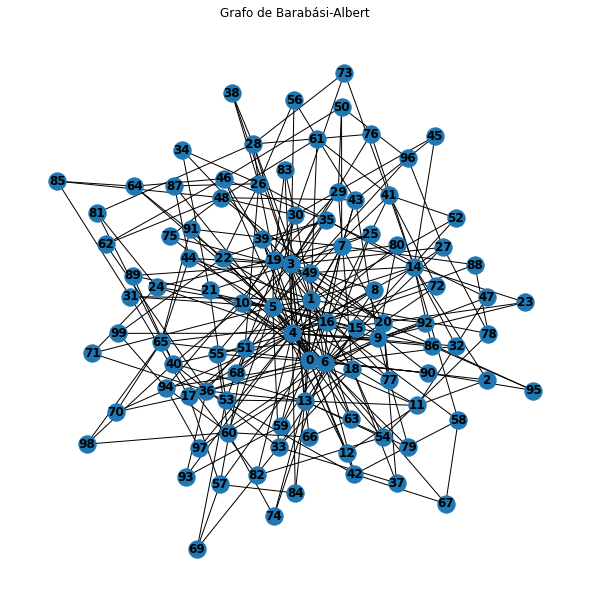

In [25]:
# Plotar o grafo de Barabási-Albert
plt.figure(figsize=(8, 8))
nx.draw(grafo_barabasi_albert, with_labels=True, font_weight='bold', arrowsize=20)
plt.title('Grafo de Barabási-Albert')
plt.show()

------------------------------------------------------------

Número de Comunidades: 9


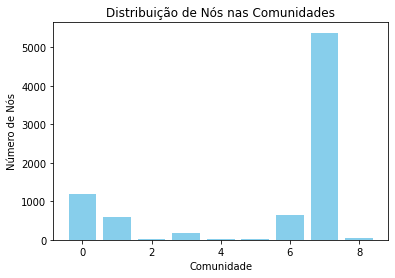

In [76]:
import community  # Instale usando: pip install python-louvain

# G é o seu grafo
partition = community.best_partition(G_undirected)

# Adiciona a partição como um atributo dos nós no grafo
nx.set_node_attributes(G, partition, 'community')

# Exibe o número de comunidades detectadas
num_communities = max(partition.values()) + 1
print(f'Número de Comunidades: {num_communities}')

# Visualiza a distribuição dos nós nas comunidades
community_sizes = [list(partition.values()).count(c) for c in set(partition.values())]
plt.bar(range(num_communities), community_sizes, color='skyblue')
plt.xlabel('Comunidade')
plt.ylabel('Número de Nós')
plt.title('Distribuição de Nós nas Comunidades')
plt.show()


-----------------------------------------------------------------

In [78]:
dataset_graph_stats = pd.read_csv('../resources/data/graph_users_with_stats_lucianobajr.csv')
dataset_graph_stats.head()

,Id,Label,TotalCommits,TotalIssues,TotalPullRequests,PublicRepos
0,0,otaviolemos,155,0,0,35
1,1,norvig,83,0,0,4
2,2,berlotto,11,0,0,128
3,3,eugeniomiro,73,3,1,51
4,4,brasten,18,0,0,69


In [84]:
graph_with_stats = G.copy()

In [96]:
for _, row in dataset_graph_stats.iterrows():
    node_id = row['Label']  # Corrigido para 'Id' em vez de 'Label'
    if graph_with_stats.has_node(node_id):
        graph_with_stats.nodes[node_id]['TotalCommits'] = row['TotalCommits']

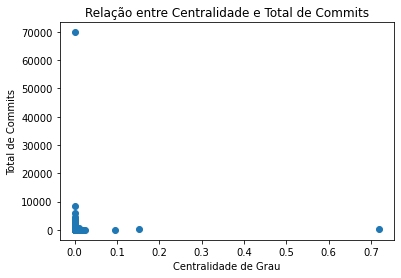

In [98]:

# Visualizando a relação entre centralidade e Total de Commits
centralities = nx.degree_centrality(graph_with_stats)
total_commits = nx.get_node_attributes(graph_with_stats, 'TotalCommits')

plt.scatter(list(centralities.values()), list(total_commits.values()))
plt.xlabel('Centralidade de Grau')
plt.ylabel('Total de Commits')
plt.title('Relação entre Centralidade e Total de Commits')
plt.show()

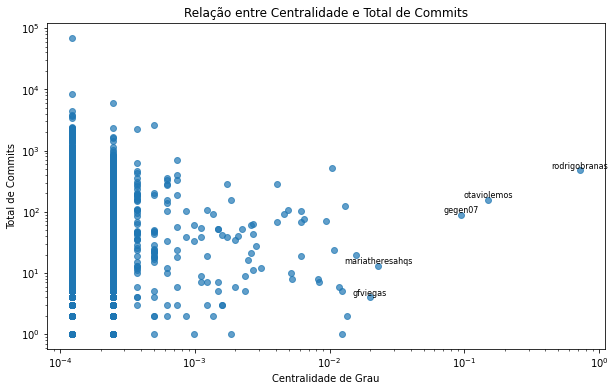

In [99]:
# Visualizando a relação entre centralidade e Total de Commits
centralities = nx.degree_centrality(graph_with_stats)
total_commits = nx.get_node_attributes(graph_with_stats, 'TotalCommits')

# Identificar usuários mais centrais
top_users = sorted(centralities, key=centralities.get, reverse=True)[:5]

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(list(centralities.values()), list(total_commits.values()), alpha=0.7)

# Adicionar rótulos aos pontos
for user_id, centrality in centralities.items():
    if user_id in top_users:
        plt.text(centrality, total_commits[user_id], str(user_id), fontsize=8, ha='center', va='bottom')

plt.xlabel('Centralidade de Grau')
plt.ylabel('Total de Commits')
plt.title('Relação entre Centralidade e Total de Commits')

# Ajustar a escala dos eixos para melhor visualização
plt.xscale('log')  # Usar escala logarítmica para centralidade
plt.yscale('log')  # Usar escala logarítmica para Total de Commits

plt.show()


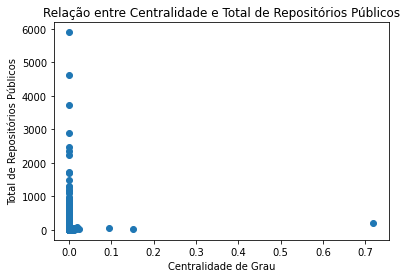

In [100]:
# Adicionando as métricas do dataset ao grafo
for _, row in dataset_graph_stats.iterrows():
    node_id = row['Label']
    if graph_with_stats.has_node(node_id):
        graph_with_stats.nodes[node_id]['PublicRepos'] = row['PublicRepos']

# Visualizando a relação entre contribuições em repositórios abertos e centralidade
public_repos = nx.get_node_attributes(graph_with_stats, 'PublicRepos')

plt.scatter(list(centralities.values()), list(public_repos.values()))
plt.xlabel('Centralidade de Grau')
plt.ylabel('Total de Repositórios Públicos')
plt.title('Relação entre Centralidade e Total de Repositórios Públicos')
plt.show()

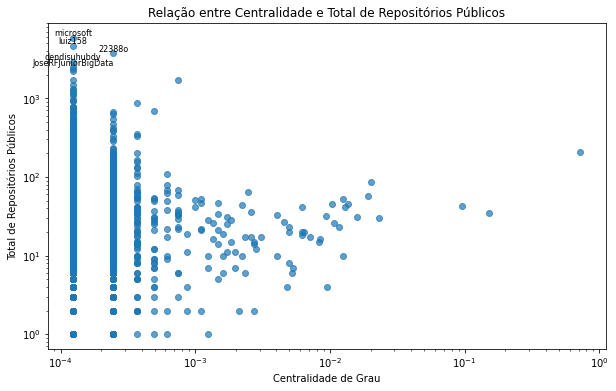

In [101]:
# Identificar nós com o maior número de repositórios públicos
top_repos_users = sorted(public_repos, key=public_repos.get, reverse=True)[:5]

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(list(centralities.values()), list(public_repos.values()), alpha=0.7)

# Adicionar rótulos aos pontos
for user_id, repos in public_repos.items():
    if user_id in top_repos_users:
        plt.text(centralities[user_id], repos, str(user_id), fontsize=8, ha='center', va='bottom')

plt.xlabel('Centralidade de Grau')
plt.ylabel('Total de Repositórios Públicos')
plt.title('Relação entre Centralidade e Total de Repositórios Públicos')

# Ajustar a escala dos eixos para melhor visualização
plt.xscale('log')  # Usar escala logarítmica para centralidade
plt.yscale('log')  # Usar escala logarítmica para Total de Repositórios Públicos

plt.show()

-------------------------------------------------------------------------

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


ModuleNotFoundError: No module named 'sklearn'